In [82]:
#pip install numpy
#pip install pandas
#pip install sklearn
#pip install ucimlrepo

In [83]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [84]:
#reading dataset

data = pd.read_csv("1712194016263_winequality-red.csv", sep = ';')

In [85]:
#reading first 5 columns of the dataset.
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [86]:
#getting shape of dataset (rows and columns)
data.shape

(1599, 12)

In [87]:
df = pd.DataFrame(data)

In [88]:
#dropping quality column
y = data.quality
X = data.drop('quality', axis=1)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [90]:
print(X_train.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1462            6.8              0.64         0.03             2.3      0.075   
174             7.3              0.38         0.21             2.0      0.080   
402            12.2              0.48         0.54             2.6      0.085   
596            12.4              0.40         0.51             2.0      0.059   
814            12.6              0.41         0.54             2.8      0.103   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1462                 14.0                  31.0  0.99545  3.36       0.58   
174                   7.0                  35.0  0.99610  3.33       0.47   
402                  19.0                  64.0  1.00000  3.10       0.61   
596                   6.0                  24.0  0.99940  3.04       0.60   
814                  19.0                  41.0  0.99939  3.21       0.76   

      alcohol  
1462     10.4  
174       9.5  
40

In [91]:
X_train_scaled = preprocessing.scale(X_train)
print (X_train_scaled)

[[-0.88635316  0.62465721 -1.25871132 ...  0.32272512 -0.4662326
  -0.03568803]
 [-0.60026683 -0.82057696 -0.33563764 ...  0.12887786 -1.10085203
  -0.88504351]
 [ 2.20337921 -0.26471767  1.35666411 ... -1.35728445 -0.29315457
   0.0586848 ]
 ...
 [-0.25696323  0.68024314 -1.36127507 ...  0.19349361  0.45685021
   1.19115878]
 [ 0.54407849  0.7080361  -0.07922829 ... -0.38804816 -1.38931541
  -0.79067068]
 [ 0.83016482  2.51457881  0.22846294 ... -0.38804816 -1.04315936
  -0.97941635]]


In [92]:
#decision tree classifier trained by the author.
clf=tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [93]:
confidence = clf.score(X_test, y_test)
print("\nThe confidence score:\n")
print(confidence)


The confidence score:

0.584375


In [94]:
y_pred = clf.predict(X_test)

In [95]:
#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 5 predictions
print("\nThe prediction:\n")
for i in range(0,5):
    print (x[i])
    
#printing first five expectations
print("\nThe expectation:\n")
print (y_test.head)



The prediction:

6
5
6
5
6

The expectation:

<bound method NDFrame.head of 55      5
1184    5
784     5
116     6
1342    6
       ..
944     7
24      6
1308    5
277     6
708     6
Name: quality, Length: 320, dtype: int64>


In [96]:
#training Random Forest classifier for testing
score = []
for i in range(1,30):
    model = RandomForestClassifier(random_state = 0, criterion = "entropy" , n_estimators = i)
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    score.append(accuracy_score(y_test, y_predict))

In [97]:
score

[0.546875,
 0.596875,
 0.575,
 0.625,
 0.640625,
 0.665625,
 0.671875,
 0.675,
 0.675,
 0.690625,
 0.68125,
 0.69375,
 0.696875,
 0.678125,
 0.684375,
 0.68125,
 0.675,
 0.6875,
 0.696875,
 0.7125,
 0.696875,
 0.7125,
 0.69375,
 0.7,
 0.69375,
 0.703125,
 0.690625,
 0.7,
 0.7125]

In [98]:
y_predict

array([5, 5, 5, 6, 6, 7, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6,
       7, 6, 5, 5, 5, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 7, 5, 7,
       5, 6, 5, 7, 5, 6, 6, 5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 7, 6, 7, 5, 5, 5, 7, 6, 6, 5,
       6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6,
       6, 6, 5, 6, 6, 5, 6, 5, 6, 7, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5,
       6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 7, 5, 8,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5,
       5, 6, 5, 6, 6, 6, 5, 7, 6, 6, 6, 6, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 7, 6, 5, 6, 6, 5, 5, 6, 6, 7, 7, 5, 5, 6, 5, 6, 6, 5, 6,
       5, 5, 5, 5, 7, 6, 6, 6, 5, 5, 6, 6, 7, 5, 6, 6, 5, 5, 5, 5, 5, 5,
       6, 5, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6,
       5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6,

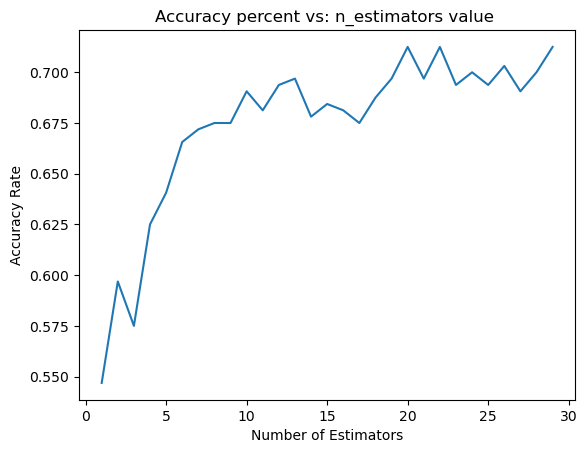

In [99]:
#plotting accuracy percentage vs n_estimators (random forest)


plt.plot(range(1,30), score)
plt.title("Accuracy percent vs: n_estimators value ")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy Rate")

plt.show()

In [100]:
max(score)

0.7125

In [101]:
#training KNeighborsClassifier for testing

from sklearn.neighbors import KNeighborsClassifier 
    
    
scores = []
for k in range (1,30):

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
  
    scores.append(accuracy_score(y_test, y_pred))

print(str(scores))
print ((y_pred))

[0.546875, 0.5125, 0.49375, 0.5, 0.53125, 0.525, 0.525, 0.515625, 0.546875, 0.534375, 0.515625, 0.521875, 0.5125, 0.503125, 0.515625, 0.53125, 0.5375, 0.540625, 0.54375, 0.528125, 0.53125, 0.50625, 0.509375, 0.5, 0.521875, 0.5125, 0.5125, 0.503125, 0.496875]
[6 5 5 5 6 7 6 6 6 6 6 5 5 6 5 5 6 5 5 5 5 5 6 6 6 5 6 6 6 5 5 5 5 7 6 5 5
 5 5 6 6 5 6 6 5 5 6 7 5 6 6 5 5 5 7 6 6 6 5 6 6 6 6 6 5 5 6 5 5 6 6 6 6 5
 5 5 5 6 6 6 6 5 5 5 7 5 6 6 5 6 5 6 6 5 6 6 6 5 5 6 5 5 5 5 5 5 6 5 6 5 6
 5 5 6 7 5 5 5 5 6 6 6 5 5 5 5 6 5 5 6 5 6 6 5 6 5 6 6 5 5 5 5 7 6 6 5 5 5
 7 5 6 7 5 6 5 5 5 5 6 6 6 6 6 7 6 6 5 5 6 5 5 5 5 6 6 5 5 5 6 6 6 6 5 6 5
 6 5 6 6 6 6 6 5 6 6 6 6 6 6 6 5 6 5 5 6 6 5 5 6 5 5 5 6 5 5 6 6 5 5 6 5 6
 6 6 7 6 6 5 5 5 5 7 6 7 5 5 5 5 6 5 5 5 5 5 5 6 6 6 6 6 5 5 6 7 6 6 6 6 5
 6 5 5 6 5 6 5 5 6 5 5 6 6 5 5 6 6 5 5 6 5 5 6 5 6 5 6 5 5 6 6 5 6 6 6 5 6
 5 5 5 6 6 5 5 6 6 5 7 6 6 5 5 6 5 5 5 5 6 5 6 5]


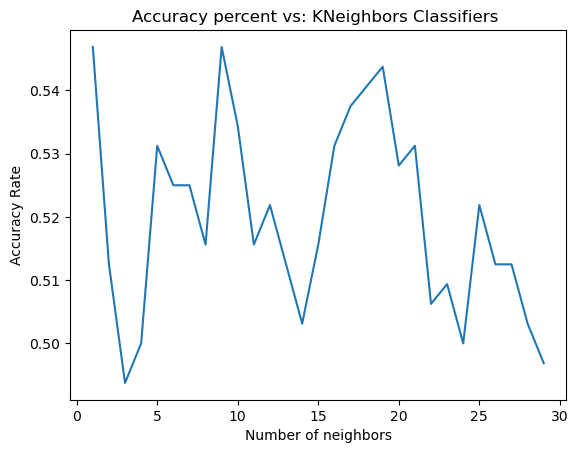

In [102]:
#plotting accuracy percentage for KNeighbors Classifiers


plt.plot(range(1,30), scores)
plt.title("Accuracy percent vs: KNeighbors Classifiers ")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy Rate")

plt.show()

In [103]:
max (scores)

0.546875

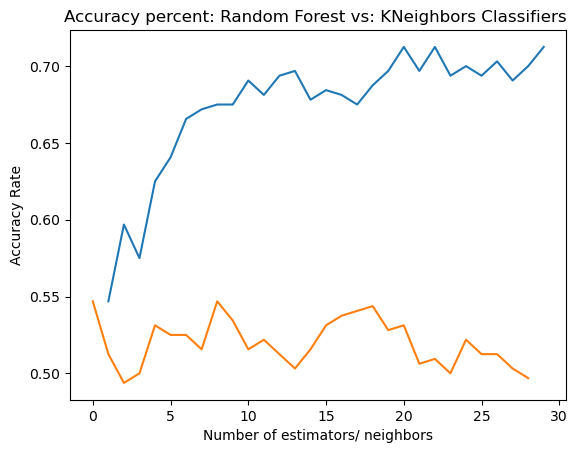

In [104]:
#comparing Random Forest Scores with KNeighbors classifier score


plt.plot(range(1,30),score, scores)
plt.title("Accuracy percent: Random Forest vs: KNeighbors Classifiers ")
plt.xlabel("Number of estimators/ neighbors")
plt.ylabel("Accuracy Rate")

plt.show()

In [105]:
# conclusion:
print ("The author has tried Decision tree models; and I have tried the Random Forest and KNNeighbors")
print ("based on above analysis, all 3 models offer similar predictions")
print ("However, the Random Forest offers highest accuracy followed by Decision Tree and KNearestNeighbors")

The author has tried Decision tree models; and I have tried the Random Forest and KNNeighbors
based on above analysis, all 3 models offer similar predictions
However, the Random Forest offers highest accuracy followed by Decision Tree and KNearestNeighbors
